In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
%matplotlib inline

In [2]:
# Import Train and Test Data 
filejson = '/Users/Administrator/Desktop/'
jsonfile=  pd.read_json(filejson + 'ultimate_data_challenge.json') 
jsondf = pd.DataFrame(jsonfile)
jsondf

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

I would do Ttest on two groups. First Group is the actual data and the second group is the Control. So I will compare their means and find if there is a diffenrence and how big . Doing this I will measure success of the experiment.

Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats

A)Survey and Data Mining to obtain enough population for test. 

B)  X^2 test is to find size of population to survey. Then, looking in descriptive statistics. After, Ttest  or A/B test to find effectivness of changes.

C)Knowing pvalue and Cohen's d I can interpret the meaning and tell if there is a success or nothing,Conversion Rate as  metrics 

# Data Cleaning and Exploring

In [4]:
jsondf.shape

(50000, 12)

In [5]:
jsondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [8]:
jsondf.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

I have null values so I will fill them with mean or mode

In [9]:
jsondf.avg_rating_of_driver

0        4.7
1        5.0
2        4.3
3        4.6
4        4.4
        ... 
49995    5.0
49996    NaN
49997    5.0
49998    3.0
49999    NaN
Name: avg_rating_of_driver, Length: 50000, dtype: float64

In [3]:
#Imputing all columns that have small % of missing data
jsondf['avg_rating_of_driver'].fillna(jsondf['avg_rating_of_driver'].mean(), inplace=True)  # filling NaN or missing value

In [4]:
jsondf.avg_rating_of_driver.isnull().sum()

0

In [5]:
#Imputing all columns that have small % of missing data
jsondf['avg_rating_by_driver'].fillna(jsondf['avg_rating_by_driver'].mean(), inplace=True)  # filling NaN or missing value


In [6]:
jsondf.avg_rating_by_driver.isnull().sum()

0

In [7]:
#Imputing all columns that have small % of missing data
jsondf['phone'].fillna(jsondf['phone'].mode()[0], inplace=True)  # filling NaN or missing value

In [8]:
jsondf.phone.isnull().sum()

0

Peeking at statistical descriptions of data

In [20]:
jsondf.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,50000.0,4.601559,0.564977,1.0,4.50,4.70,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,50000.0,4.778158,0.445753,1.0,4.70,5.00,5.00,5.00


In [26]:
jsondf.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_rating_by_driver
avg_dist,,,,,,,,,,,
3.67,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,5.0
8.26,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,5.0
0.77,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,5.0
2.36,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,4.9
3.13,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,4.9


Next, I look for trends

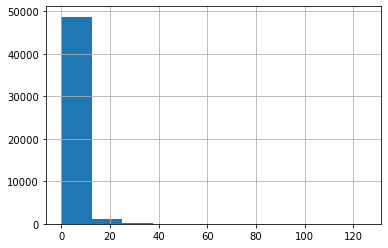

In [7]:
jsondf.trips_in_first_30_days.hist()

In [29]:
jsondf.surge_pct.idxmax()

5.97

In [55]:
jsondf.index

Float64Index([              3.67,               8.26,               0.77,
                            2.36,               3.13,              10.56,
                            3.95,               2.04,               4.36,
                            2.37,
              ...
                            3.38,               1.06,               7.58,
              2.5300000000000002,               2.25,               5.63,
                             0.0,               3.86,               4.58,
                            3.49],
             dtype='float64', name='avg_dist', length=50000)

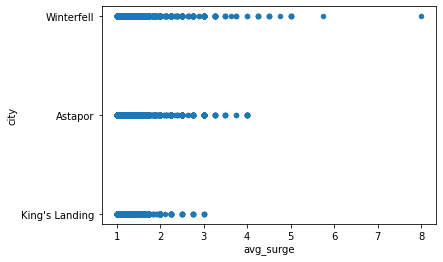

In [10]:
jsondf.plot.scatter(x='avg_surge',

                      y='city'

                     )


avg_surge: The average surge multiplier over all of this user’s trips


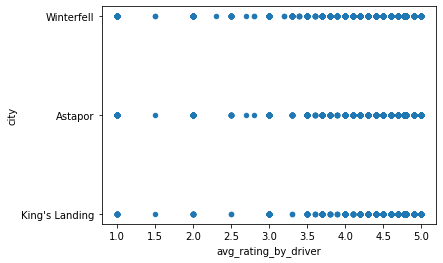

In [41]:
jsondf.plot.scatter(x='avg_rating_by_driver',

                      y='city'

                     )

Text(0.5, 1.0, 'Dot Plot : Green Dot')

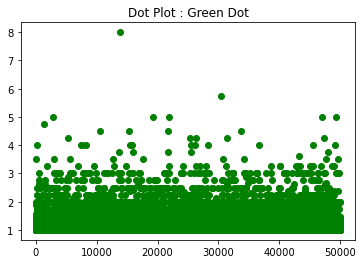

In [11]:
import matplotlib
import csv
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
# function for a different figure

# plotting using plt.pyplot() Figure 2
plt.plot(jsondf.avg_surge, 'go')

# axis labeling
plt.xlabel('')
plt.ylabel('')

# figure name
plt.title('Dot Plot : Green Dot')

Text(0.5, 1.0, 'Dot Plot : Green Dot')

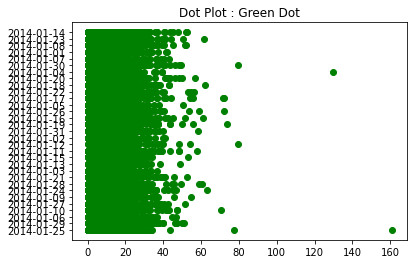

In [46]:
import matplotlib
import csv
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
# function for a different figure

# plotting using plt.pyplot() Figure 2
plt.plot(jsondf.signup_date, 'go')

# axis labeling
plt.xlabel('')
plt.ylabel('')

# figure name
plt.title('Dot Plot : Green Dot')

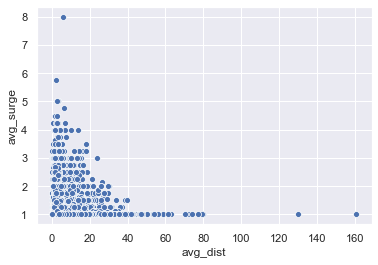

In [22]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="avg_dist", y='avg_surge',
                     
                   data=jsondf)

# Predictive Model

In [9]:
X = jsondf.loc[:,jsondf.columns!='ultimate_black_user']
from sklearn.preprocessing import OneHotEncoder
traindfcat = X.select_dtypes(include ='object') 
enc = OneHotEncoder(sparse=False)
X_transfCat = enc.fit_transform(traindfcat)


In [10]:
traindfscaled = X.select_dtypes(exclude ='object') 
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(traindfscaled)


In [11]:
scaledf=np.array(X_scaled) # Convert to a numpy array
encodedf =np.array(X_transfCat) # Convert to a numpy array
combodf =  np.concatenate([scaledf, encodedf],axis=1)

In [12]:
Active = jsondf[jsondf['ultimate_black_user'] == True]

Not_Active = jsondf[jsondf['ultimate_black_user'] == False]

In [14]:
Y = np.array(jsondf['ultimate_black_user'])
from sklearn.ensemble import IsolationForest

# Define a random state 
state = np.random.RandomState(42)
    
clf = IsolationForest(n_estimators=1000, max_samples=len(combodf), 
                                       random_state=state, verbose=1).fit(combodf)
y_pred = clf.predict(combodf)
# Run Classification Metrics

y_pred = pd.Series([0 if y_pred[i] <= 0.5 else 1 for i in range(len(y_pred))])
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.2min finished


array([[    0, 31146],
       [    0, 18854]], dtype=int64)

help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate
What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).